In [35]:
%matplotlib inline
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import silhouette_score as sil_score

from sklearn.metrics import davies_bouldin_score as db_score
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
import seaborn as sns

In [124]:
import matplotlib.colors as colors
from itertools import cycle

def DB_index(X,labels):
    def dist(a,b):
        return euclidean_distances(a,b)
    k=np.unique(labels).size
    
    clusters = [X[labels==i] for i in range(k)]
    
    centroids =[np.mean(clusters[i],axis=0) for i in range(k)]
    
    centroid_distance = dist(centroids,centroids)
    
    intra_cluster = [np.mean(dist(clusters[i],clusters[i])) for i in range(k)]
    
    res = np.sum([max(((intra_cluster[i] + intra_cluster[j]) / centroid_distance[i][j] for j in range(k) if i != j))
                  for i in range(k)]) / k
    return res

def Dunn_index(X,labels):
    def dist(a,b):
        return euclidean_distances(a,b)
    
    k=np.unique(labels).size
    
    clusters = [X[labels==i] for i in range(k)]
    
    centroids =[np.mean(clusters[i],axis=0) for i in range(k)]

    centroid_distance = dist(centroids,centroids)  

    intra_cluster = [np.mean(dist(clusters[i],clusters[i])) for i in range(k)]
    max_intra = max(intra_cluster[i] for i in range(k))

    res = min(min(centroid_distance[i][j]/max_intra for j in range(k) if j!= i)for i in range(k))
    
    return res


def Dunn_index_small(X,labels):
    def dist(a,b):
        return euclidean_distances(a,b)
    k=np.unique(labels).size
    
    clusters = [X[labels==i] for i in range(k)]
    
    centroids =[np.mean(clusters[i],axis=0) for i in range(k)]
    new = 100
    for i in range(k):
        for j in range(i+1,k):
            temp=np.min(dist(clusters[i],clusters[j]))
            if temp < new:
                new = temp
    centroid_distance = dist(centroids,centroids)  
    intra_cluster = [np.max(dist(clusters[i],clusters[i])) for i in range(k)]
    max_intra = max(intra_cluster[i] for i in range(k))
    return new / max_intra


def metrics(data,labels,param):
    sil = sil_score(data,labels)
    dun_normal=Dunn_index(data,labels)
    DB = DB_index(data,labels)
    dun_small = Dunn_index_small(data,labels)
    print(f'For Param : {param} these are the indicates:')
    print(f'Sil_score: {sil}')
    print(f'Dunn_index: {dun_normal}')
    print(f'DB_index: {DB}')
    print(f'Dunn_index_small: {dun_small}')
    
          
def plotClustering(X, plt_labels,param):
    plt_colors = cycle(['b','g','r','c','m','y','k'])


    plt_K = np.unique(plt_labels).size
    plt.title(param)
    for k in range(-1,plt_K):
        color = next(plt_colors)
        mask = (plt_labels == k)
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')
    plt.show()
        
def subplotClustering(Y,plt_labels,n,param,x,y):
    (fig, axs) = plt.subplots(n,figsize=[5, 20,])
    for i in range(n):
        plt_colors = cycle(['b','g','r','c','m','y','k','w'])
        X = Y[i]
        axs[i].set_title(param[i])
        axs[i].set_xlim(x)
        axs[i].set_ylim(y)
        plt_K = np.unique(plt_labels[i]).size
        for k in range(-1,plt_K):
            color = next(plt_colors)
            mask = (plt_labels[i] == k)
            axs[i].plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')


        

    

1. Pierwszy zestaw danych
Dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich

In [8]:
from sklearn import datasets

centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)
centers_ = [[1, 1], [3, 3], [5, 1]]
blobX, blobY  = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)




Grupowanie za pomocą KMeans

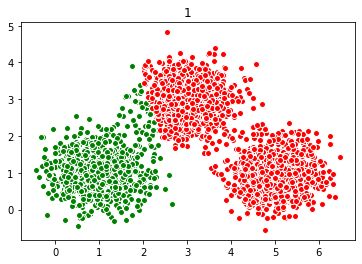

0.8998033693819513


0.6831571790475361

In [9]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=1)
k_means.fit(X)

plotClustering(X,k_means.labels_,1)
print(DB_index(X,k_means.labels_))
db_score(X,k_means.labels_)

Grupowanie za pomocą MiniBatchKMeans

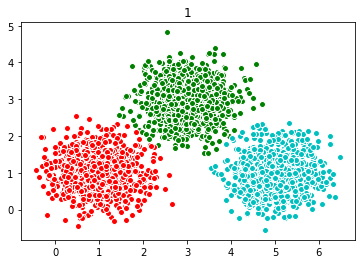

In [11]:
mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, n_init=1, max_no_improvement=10, verbose=0, random_state=0)
mini_batch_k_means.fit(X)

plotClustering(X, mini_batch_k_means.labels_,1)

**Grupowanie za pomocą Birch bez wtórnego grupowania**

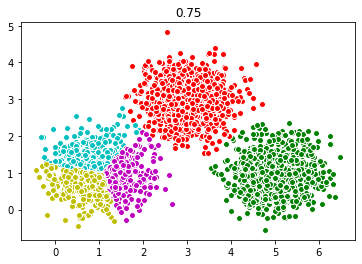

In [13]:
birch = Birch(threshold=0.75, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_,0.75)

**Grupowanie za pomocą Birch z wtórnym grupowaniem**

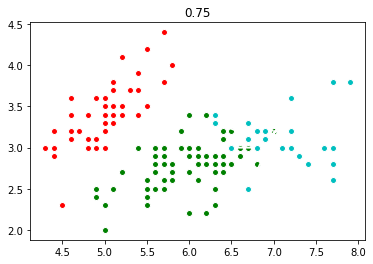

In [24]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plotClustering(X, birch.labels_,0.75)

**Grupowanie za pomocą DBScan**

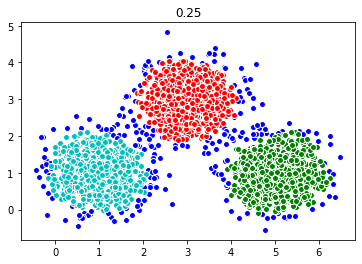

In [15]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

plotClustering(X, dbscan.labels_,0.25)

**2. Drugi zestaw danych**

In [16]:
from sklearn import datasets
iris = datasets.load_iris()
Y = iris.data

# Task 0. A

For Param : 1 these are the indicates:
Sil_score: 0.5511916046195915
Dunn_index: 1.7601657664440435
DB_index: 0.9217362917162593
Dunn_index_small: 0.10943513103292506
For Param : 10000 these are the indicates:
Sil_score: 0.5528190123564091
Dunn_index: 1.7668036764129216
DB_index: 0.9156041068134684
Dunn_index_small: 0.09880739332810617


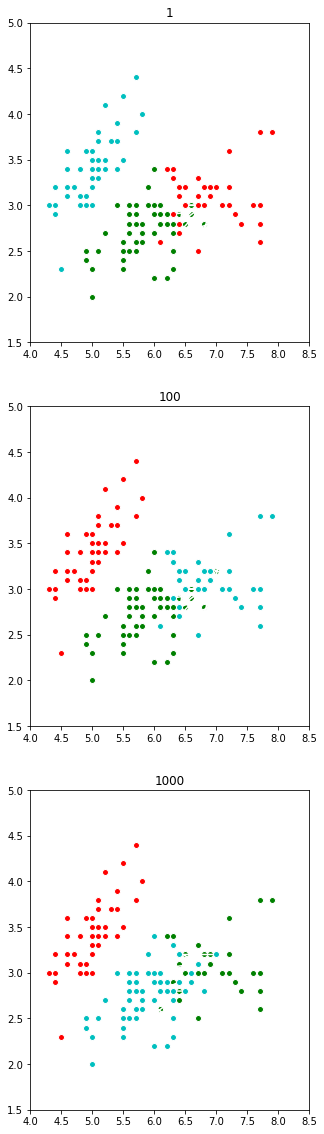

In [127]:
X = iris.data
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10000)
k_means.fit(X)
k_means_1 = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means_1.fit(X)
k_means_2 =  KMeans(init='k-means++', n_clusters=3, n_init=100)
k_means_2.fit(X)
subplotClustering([Y[:, :2],Y[:, :2],Y[:, :2]],[k_means_1.labels_,k_means_2.labels_,k_means.labels_],3,[1,100,1000],[4,8.5],[1.5,5])
metrics(X,k_means_1.labels_,1)

metrics(X,k_means.labels_,10000)

# B

For Param : 0.75 these are the indicates
Sil_score: 0.535502288245556
Dunn_index: 1.6960178507662027
DB_index: 0.8861167050020118
Dunn_index_small: 0.07844645405528439


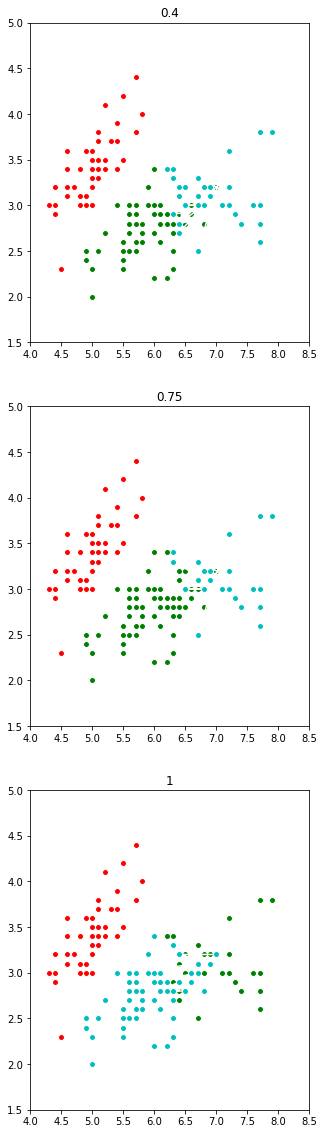

In [123]:
birch=Birch(threshold=0.4,n_clusters=3)
birch.fit(Y)
birch_1=Birch(threshold=0.75,n_clusters=3)
birch_1.fit(Y) 
birch_2=Birch(threshold=1,n_clusters=3)
birch_2.fit(Y)
subplotClustering([Y[:, :2],Y[:, :2],Y[:, :2]],[birch.labels_,birch_1.labels_,birch_2.labels_],3,[0.4,0.75,1],[4,8.5],[1.5,5])

metrics(Y,birch_1.labels_,0.75)

# C

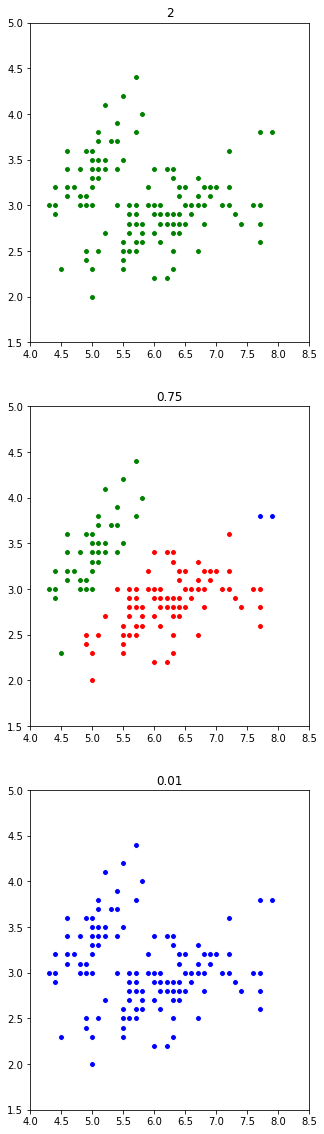

In [121]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(Y)
dbscan_1= DBSCAN(eps=0.75,min_samples=5)
dbscan_1.fit(Y)
dbscan_2=DBSCAN(eps=0.01,min_samples=5)
dbscan_2.fit(Y)
subplotClustering([Y[:, :2],Y[:, :2],Y[:, :2]],[dbscan.labels_,dbscan_1.labels_,dbscan_2.labels_],3,[2,0.75,0.01],[4,8.5],[1.5,5])


# E

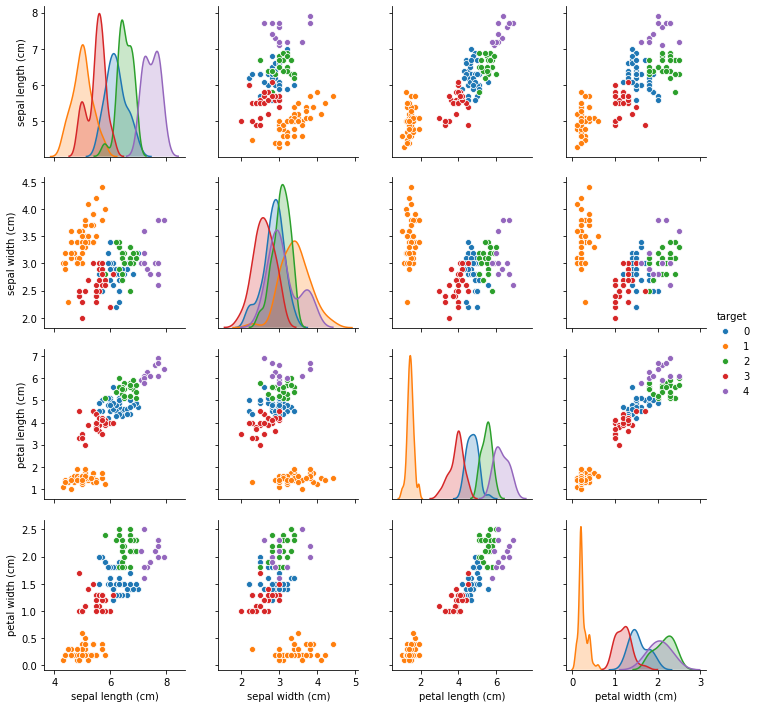

In [20]:
Y = iris.data
df = pd.DataFrame(iris.data,columns=iris.feature_names)
k_means =KMeans(init='k-means++', n_clusters=5, n_init=100)
k_means.fit(Y)
df['target'] = k_means.labels_
sns.pairplot(df,hue='target',vars=iris.feature_names)

In [21]:
print(len(np.bincount(k_means.labels_)))
labels=k_means.labels_


5


In [22]:
kmeans = KMeans(n_init=100, n_clusters=3).fit(iris.data)
print(DB_index(iris.data,kmeans.labels_))

0.9156041068134684


In [54]:


Dunn_index_small(iris.data,kmeans.labels_)


0.09880739332810617

# Task 1

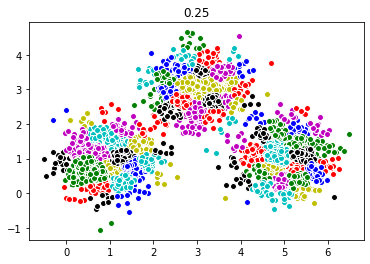

For Param : 0.25 these are the indicates:
Sil_score: 0.30563894343693765
Dunn_index: 0.9353184720528445
DB_index: 1.0259016857132344
Dunn_index_small: 0.01273484474683927


In [125]:
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)
birch = Birch(threshold=0.25,n_clusters=None)
birch.fit(X)
plotClustering(X, birch.labels_,0.25)
metrics(X,birch.labels_,0.25)



[[5.00632482 1.03500402]
 [1.11195862 1.19422066]
 [3.0782792  3.05013547]]


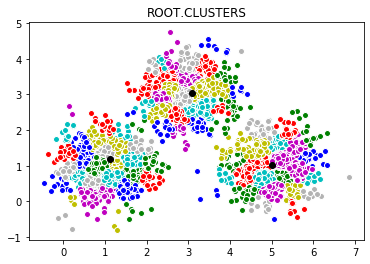

In [111]:
plt_colors = cycle(['b','g','r','c','m','y','0.70'])
plt_labels = birch.labels_

plt_K = np.unique(plt_labels).size
plt.title('ROOT.CLUSTERS')
for k in range(-1,plt_K):
    color = next(plt_colors)
    mask = (plt_labels == k)
    plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')

centre=birch.root_.centroids_
plt.plot(centre[0,0],centre[0,1],'w',marker='o',color = 'k')
plt.plot(centre[1,0],centre[1,1],'w',marker='o',color = 'k')
plt.plot(centre[2,0],centre[2,1],'w',marker='o',color = 'k')



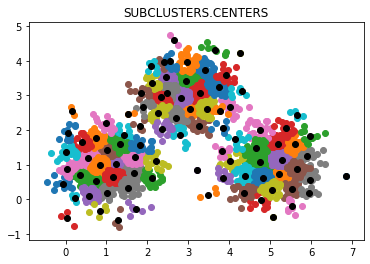

In [109]:
plt_colors = cycle(['b','g','r','c','m','y','0.70'])
plt_labels = birch.labels_

plt_K = np.unique(plt_labels).size
plt.title('SUBCLUSTERS.CENTERS')
for k in range(-1,plt_K):
    color = next(plt_colors)
    mask = (plt_labels == k)
    plt.scatter(X[mask, 0], X[mask, 1])

centre=birch.subcluster_centers_
x=centre[:,0]
y=centre[:,1]
plt.scatter(x,y,color='k')
